##### Linear Regression  is one of the supervised machine learning model,it uses the independent variables(features) to predict dependent variable(target).
##### Here the data should be assumed as linera data,no multicolinearity,correlation between features and target is high,and each observation is independent.
##### In Linear Regression the target column is always continuous variable.
##### It uses a slope with B0(beta not) as intercept and B1,B2,B3...(beta1,bet2..)(n coefficient based on number of features) it will predict target.
##### 2 types: i.Simple Linear Regression   ii.Multiple Linear Regression

#### Objective: Predict the Price based on other given attributes

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import r2_score

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv("ToyotaCorolla - MLR.csv")

In [6]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [7]:
## NO null data 
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [8]:
## Here duplicate entry is not required(same car data can be present twice)

In [9]:
num_cols=[col for col in df.columns if df[col].dtype!='O']
num_cols

['Price',
 'Age_08_04',
 'KM',
 'HP',
 'Automatic',
 'cc',
 'Doors',
 'Cylinders',
 'Gears',
 'Weight']

In [10]:
cat_cols=[col for col in df.columns if df[col].dtype=='O']
cat_cols

['Fuel_Type']

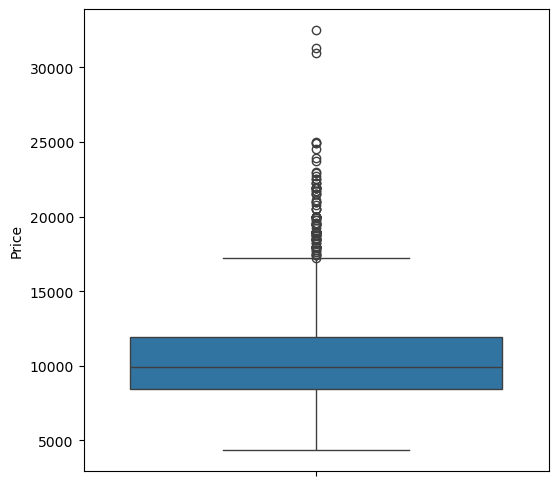

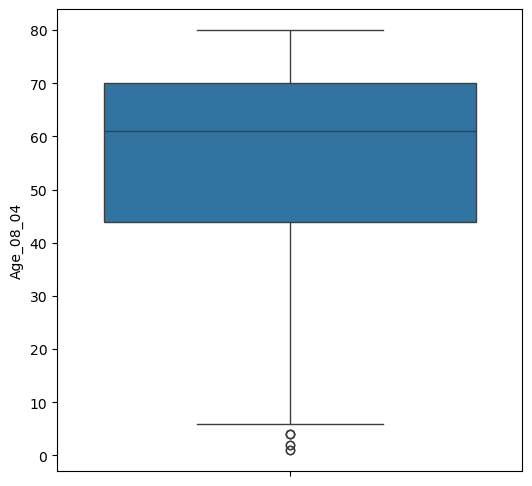

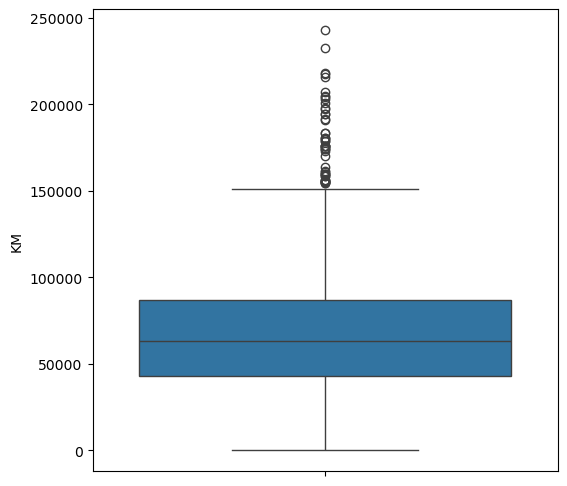

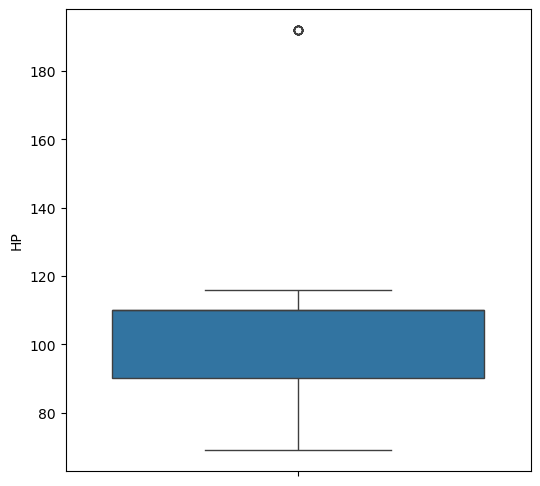

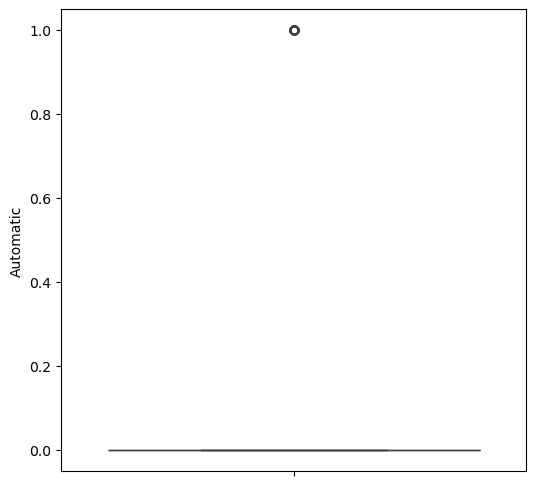

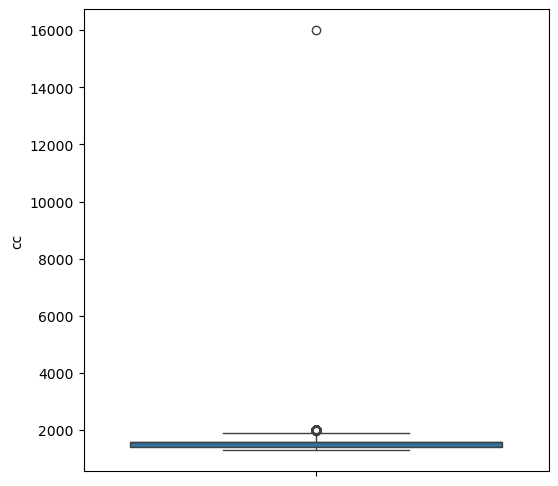

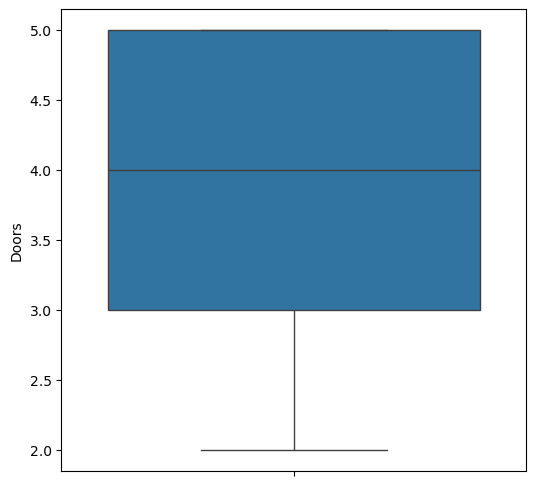

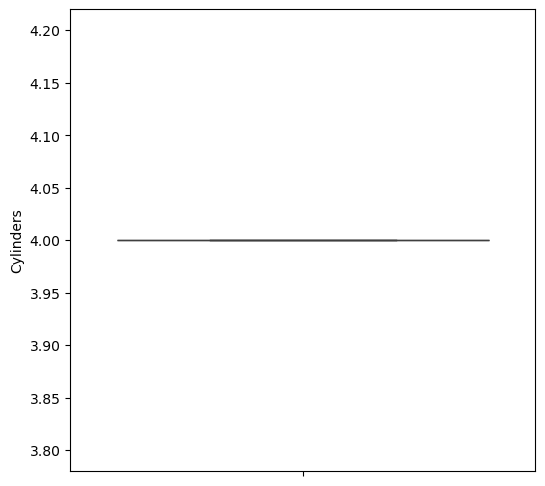

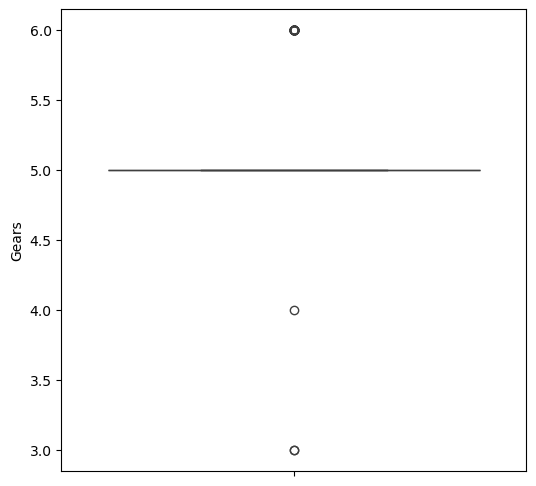

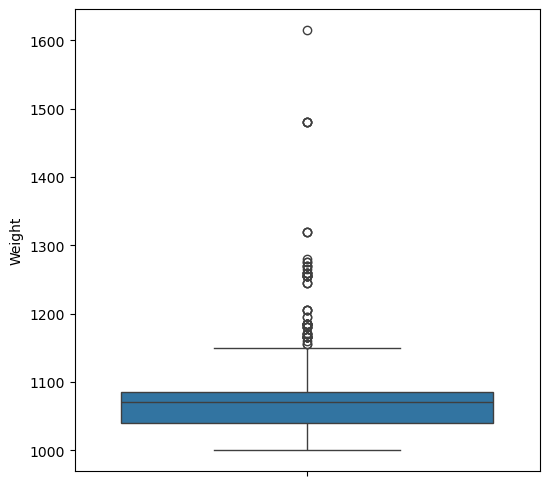

In [11]:
for col in num_cols:
    plt.figure(figsize=(6,6))
    sns.boxplot(df[col])
    plt.show()


#### Boxplot isshowing the data points outside the boundaries in both lower and upper of the boundaries..
#### it is considered as outliers...It indicates extreme values in both directions..
#### Here price(in upper extreme),Age( lower extreme),KM(upper extreme),and weight (in upper extreme) contains most outliers.others contains few data

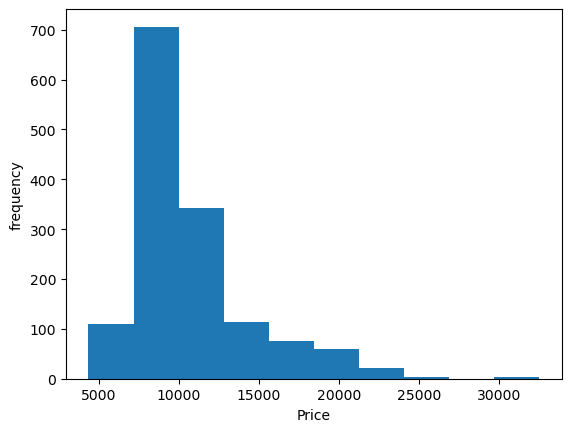

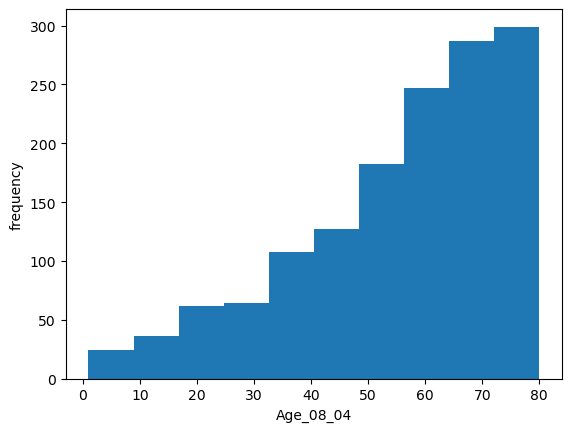

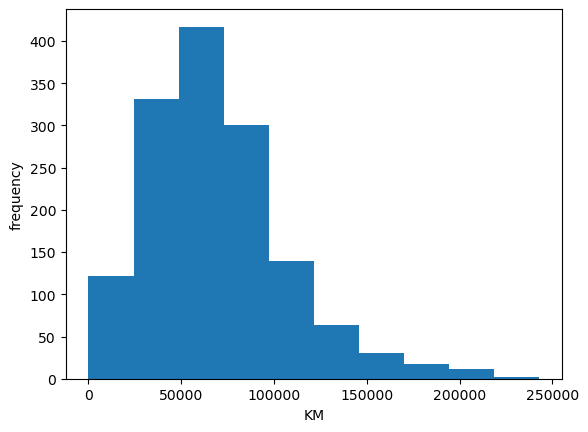

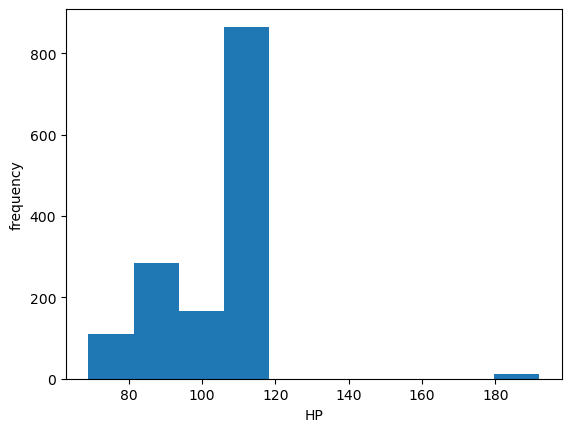

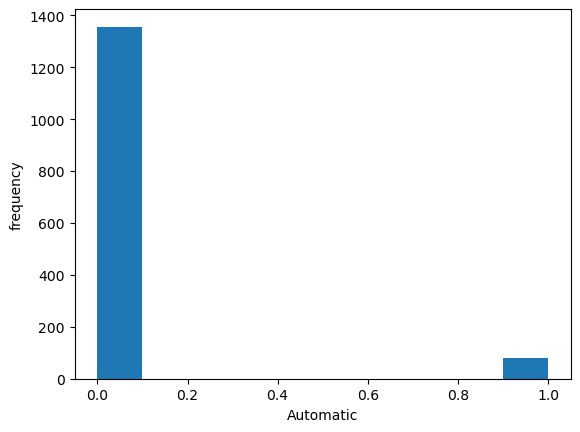

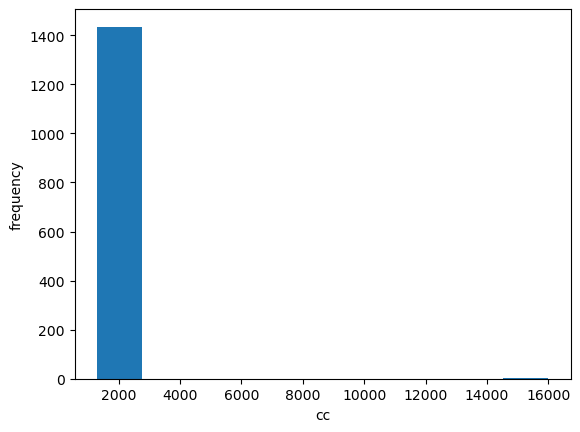

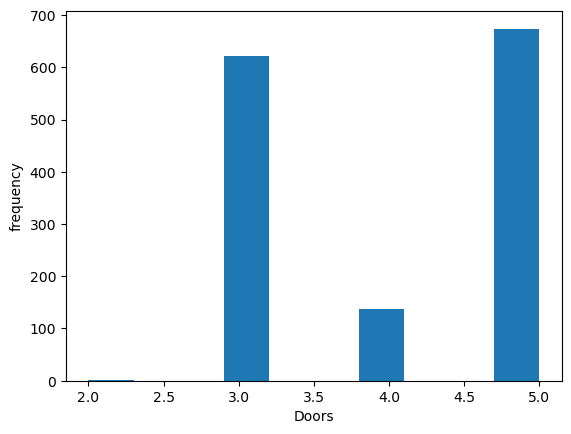

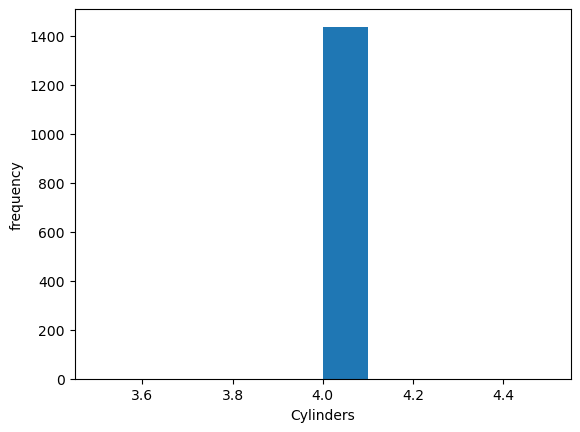

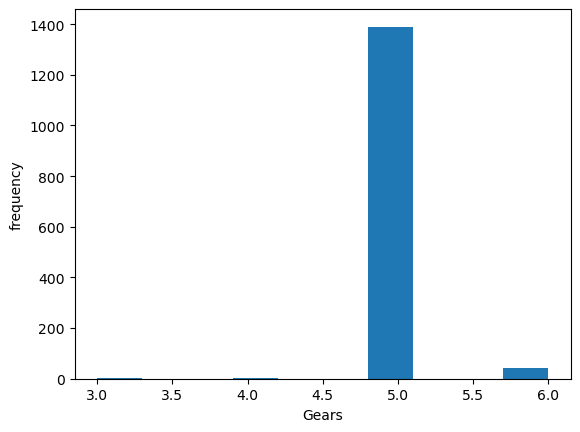

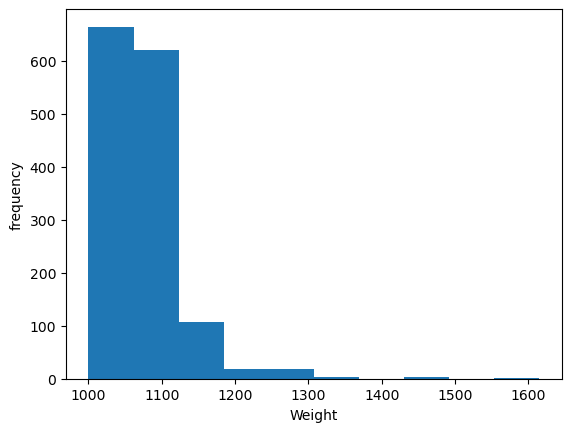

In [13]:
for col in num_cols:
    plt.hist(df[col])
    plt.xlabel(col)
    plt.ylabel('frequency')
    plt.show()

#### Histogram is showing the distribution of data (normal or skewed)
#### Here price,age,KM,weight are not normally distributed..therefore it shows the outliers present in the dataset
#### therefore it is important to find and remove the outliers 

In [24]:
##finding outliers
no_outliers=df.copy()
for col in num_cols:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    IQR=q3-q1
    lower_bound=q1-1.5*IQR
    upper_bound=q3+1.5*IQR
    no_outliers=no_outliers[(no_outliers[col]<=upper_bound) & (no_outliers[col]>=lower_bound)]
    

In [25]:
no_outliers

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
9,12950,23,71138,Diesel,69,0,1900,3,4,5,1105
18,16750,24,25563,Petrol,110,0,1600,3,4,5,1065
19,16950,30,64359,Petrol,110,0,1600,3,4,5,1105
20,15950,30,67660,Petrol,110,0,1600,3,4,5,1105
22,15950,28,56349,Petrol,110,0,1600,3,4,5,1120
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [26]:
df.shape

(1436, 11)

In [27]:
no_outliers.shape

(1098, 11)

In [28]:
outliers=df.drop(no_outliers.index)

In [29]:
outliers.shape

(338, 11)

In [31]:
338+1098

1436

In [32]:
df1=no_outliers
df1.reset_index(drop=True,inplace=True)

In [33]:
cor=df1[num_cols].corr()
cor

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
Price,1.000000,-0.867168,-0.531257,0.111864,NaN,0.109523,0.178103,NaN,NaN,0.472660
Age_08_04,-0.867168,1.000000,0.468104,0.011544,NaN,-0.066002,-0.102536,NaN,NaN,-0.388867
KM,-0.531257,0.468104,1.000000,-0.046861,NaN,0.142423,0.010608,NaN,NaN,-0.030156
HP,0.111864,0.011544,-0.046861,1.000000,NaN,0.592455,0.170784,NaN,NaN,0.308100
Automatic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc,0.109523,-0.066002,0.142423,0.592455,NaN,1.000000,0.218468,NaN,NaN,0.617273
Doors,0.178103,-0.102536,0.010608,0.170784,NaN,0.218468,1.000000,NaN,NaN,0.535303
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Weight,0.472660,-0.388867,-0.030156,0.308100,NaN,0.617273,0.535303,NaN,NaN,1.000000


In [35]:
#sns.pairplot(df1[num_cols])
#plt.tight_layout()

In [45]:
#### Pairplot returns the scatter plot between every numerical_pair of the dataset.
#### Scatter plot gives the relationship between 2 numerical_columns.(linear or non linear).
#### From this we can observe that Price and Age_08_04 are linearly Highly correlated as Age increases Price is decreasinG.

<Axes: >

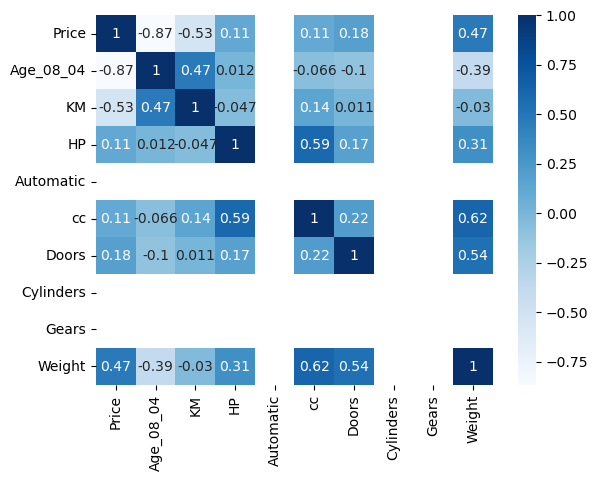

In [48]:
sns.heatmap(cor,annot=True,cmap='Blues')
## from this we can analyze the correlation... price and Age are highly correlated(-vely)

In [49]:
### Deviding the filtered(outliers removed) dataset columns into features and target.

In [52]:
features=df1.drop('Price',axis=1)
features

,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,23,71138,Diesel,69,0,1900,3,4,5,1105
1,24,25563,Petrol,110,0,1600,3,4,5,1065
2,30,64359,Petrol,110,0,1600,3,4,5,1105
3,30,67660,Petrol,110,0,1600,3,4,5,1105
4,28,56349,Petrol,110,0,1600,3,4,5,1120
...,...,...,...,...,...,...,...,...,...,...
1093,69,20544,Petrol,86,0,1300,3,4,5,1025
1094,72,19000,Petrol,86,0,1300,3,4,5,1015
1095,71,17016,Petrol,86,0,1300,3,4,5,1015
1096,70,16916,Petrol,86,0,1300,3,4,5,1015


In [54]:
target=df1['Price']
target

0       12950
1       16750
2       16950
3       15950
4       15950
        ...  
1093     7500
1094    10845
1095     8500
1096     7250
1097     6950
Name: Price, Length: 1098, dtype: int64

In [56]:
features_num_col=[col for col in features.columns if features[col].dtype!='O']
features_num_col.remove('Automatic')
features_num_col

['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Cylinders', 'Gears', 'Weight']

In [58]:
def correlation(dataset,threshold):
    corr=dataset.corr()
    col_corr=set()
    for i in range(len(corr.columns)):
        for j in range(i):
            if abs(corr.iloc[i,j])>threshold:
                col_name1=corr.columns[i] 
                col_name2=corr.columns[j] 
                col_corr.add((col_name1,col_name2))
            

    return col_corr

In [60]:
correlation(features[features_num_col],0.7)

set()

##### It returned empty set..from this we can conclude that there is no pairs in the features are highly correlated
##### therefore...no multicolinearity in this data set

In [63]:
features=pd.get_dummies(features,columns=['Fuel_Type'],dtype='int',drop_first=True)
features

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,23,71138,69,0,1900,3,4,5,1105,1,0
1,24,25563,110,0,1600,3,4,5,1065,0,1
2,30,64359,110,0,1600,3,4,5,1105,0,1
3,30,67660,110,0,1600,3,4,5,1105,0,1
4,28,56349,110,0,1600,3,4,5,1120,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1093,69,20544,86,0,1300,3,4,5,1025,0,1
1094,72,19000,86,0,1300,3,4,5,1015,0,1
1095,71,17016,86,0,1300,3,4,5,1015,0,1
1096,70,16916,86,0,1300,3,4,5,1015,0,1


In [65]:
scaler=StandardScaler()

In [67]:
features[features_num_col]=scaler.fit_transform(features[features_num_col])
features.head(5)

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,-2.288994,0.184006,-3.052238,0,2.762203,-1.105551,0.0,0.0,1.683106,1,0
1,-2.224668,-1.453622,0.683134,0,0.581673,-1.105551,0.0,0.0,0.290637,0,1
2,-1.838717,-0.059581,0.683134,0,0.581673,-1.105551,0.0,0.0,1.683106,0,1
3,-1.838717,0.059032,0.683134,0,0.581673,-1.105551,0.0,0.0,1.683106,0,1
4,-1.967368,-0.347401,0.683134,0,0.581673,-1.105551,0.0,0.0,2.205282,0,1


In [69]:
## Splitting the dataset as training and testing
x_train,x_test,y_train,y_test=train_test_split(features,target,random_state=100,train_size=0.8)

In [71]:
x_train.shape

(878, 11)

In [73]:
x_test.shape

(220, 11)

In [75]:
y_train.shape

(878,)

In [77]:
y_test.shape

(220,)

In [79]:
mlr=LinearRegression()

In [81]:
mlr.fit(x_train,y_train)

LinearRegression()

In [83]:
y_pred=mlr.predict(x_train)

In [85]:
y_pred

array([ 9415.94768058, 10959.31383238,  9808.59021423, 12796.7981412 ,
        7883.64749317,  7514.06919934,  7532.80628005,  9537.53988034,
        8054.59172703,  9326.47674843,  7171.3373556 ,  8335.4646243 ,
       13512.30340623, 11327.89371705, 12612.37126251, 12357.45352082,
        7184.01887526,  8680.51526428, 10597.04722688, 13045.54654763,
       12771.69678567, 10001.56158505,  8780.74177822,  9090.41512566,
       13038.39996832,  9676.50606426,  8013.43077914,  9280.49254177,
        8621.75663895,  9956.49689102, 10264.52864107,  7781.31955836,
       10010.68046385,  9003.5703477 , 11673.0969934 ,  9930.36747067,
       12139.32800921,  7441.41900202, 11625.12174268,  9589.34814851,
       10997.75458574, 12598.66798668, 10327.46267204,  9307.69275052,
        9418.2970528 , 10600.64283244, 11292.90442976, 11707.14258632,
       10293.80368492, 11012.48003707,  8175.51286687, 12427.05752513,
        8255.84230161, 11290.46784295,  8989.30416666,  8035.32746046,
      

In [87]:
y_train

687     8950
417    11500
569     8950
163    13750
973     7950
       ...  
802     7450
53     16500
350    10500
79     12500
792     7900
Name: Price, Length: 878, dtype: int64

In [89]:
y_pred1=mlr.predict(x_test)

In [91]:
y_pred1

array([12961.09985433,  8253.73676972, 13693.86540815,  6903.61820426,
        9206.43847778,  7693.58492834, 12976.62278012, 10925.01670649,
       15432.30467124, 11483.96706067,  9855.02944198, 13065.93245271,
        7155.22319877,  7341.71389728, 10221.09321233,  8816.44661067,
       13099.43069285,  9708.07511784,  7768.03532116,  8911.70250034,
       11100.03597754, 10070.49236888,  9825.39157279,  8298.36345238,
       13865.22387775,  7491.21026198,  8466.07158344,  8233.91340332,
       10505.58982184, 16830.49261509,  9808.77885424, 15906.01525404,
       12520.69791639,  8016.0826744 ,  8286.55435414, 10515.85562254,
        8421.11632521,  9435.9551438 , 14873.02998351,  7839.10711049,
       11136.52197586,  9265.78372174,  9991.40865101,  7457.45153498,
       10931.14545103, 15161.3989504 , 15672.74757899,  9503.36268269,
       12044.94815008, 10765.56611972,  9101.47110989,  9460.70968874,
       10091.04777451,  7983.68617445, 12850.18980096,  6159.47972703,
      

In [93]:
y_test

146     12950
975      8500
157     12295
800      7950
479      8950
        ...  
1005     6900
253     10500
960      7400
41      16650
726      9750
Name: Price, Length: 220, dtype: int64

In [95]:
training_validation_score=r2_score(y_train,y_pred)
training_validation_score

0.8163670013345727

In [97]:
testing_validation_score=r2_score(y_test,y_pred1)
testing_validation_score

0.8221825828698164

In [99]:
lasso=Lasso(alpha=1)

In [101]:
lasso.fit(x_train,y_train)

Lasso(alpha=1)

In [103]:
y_pred=lasso.predict(x_train)
y_pred

array([ 9425.78019874, 10915.95187693,  9800.31915957, 12699.99675876,
        7910.22192902,  7552.48551851,  7562.98299951,  9447.84889143,
        8017.95209885,  9333.08874917,  7156.4765694 ,  8337.75543584,
       13409.8160205 , 11283.19913959, 12535.81717153, 12523.62756921,
        7136.320595  ,  8682.09412772, 10578.00993735, 12957.39231154,
       12685.62396312, 10227.49884318,  8458.70470189,  9082.21270894,
       12944.66550838,  9652.47456204,  8053.80116576,  9216.18258093,
        8637.17250114,  9855.33512075, 10147.63662755,  7830.23196595,
       10002.61983841,  8943.79722014, 11857.60128383,  9900.40185625,
       12067.8946417 ,  7484.94465863, 11578.13304656,  9593.56843642,
       10878.63971486, 12536.32559533, 10542.36562515,  9312.04819037,
        9411.55976641, 10552.88527725, 11244.49363833, 11891.33711584,
       10241.96566788, 10985.59655733,  8199.84197569, 12364.4507126 ,
        8188.30572554, 11231.57904323,  8992.10810181,  8085.5850245 ,
      

In [105]:
y_pred1=lasso.predict(x_test)

In [107]:
lasso_training_validation_score=r2_score(y_train,y_pred)
lasso_training_validation_score

0.8146937174610176

In [109]:
lasso_testing_validation_score=r2_score(y_test,y_pred1)
lasso_testing_validation_score

0.8259667266058307

In [111]:
param={'alpha':range(1,10)}
param

{'alpha': range(1, 10)}

In [113]:
grid_search=GridSearchCV(lasso,param)
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=Lasso(alpha=1), param_grid={'alpha': range(1, 10)})

In [114]:
grid_search.best_params_

{'alpha': 1}

In [117]:
## Ridge

In [119]:
ridge=Ridge(alpha=1)

In [121]:
grid_search=GridSearchCV(ridge,param)
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=Ridge(alpha=1), param_grid={'alpha': range(1, 10)})

In [122]:
grid_search.best_params_

{'alpha': 1}

In [125]:
ridge.fit(x_train,y_train)

Ridge(alpha=1)

In [128]:
y_pred=ridge.predict(x_train)
y_pred

array([ 9433.6426325 , 10885.81004101,  9795.05221227, 12627.85362289,
        7938.84345254,  7589.19492048,  7593.06214076,  9377.00230534,
        7985.57905405,  9338.39074469,  7136.76938288,  8346.70911172,
       13327.61529857, 11249.7129605 , 12476.30533828, 12647.66771919,
        7100.59297552,  8688.81371403, 10555.60577126, 12886.86451865,
       12618.40840139, 10400.34165233,  8209.0273379 ,  9080.93709628,
       12870.25748387,  9639.83608308,  8081.53790082,  9156.04389508,
        8657.05989439,  9773.58113913, 10058.39419111,  7870.0372369 ,
        9990.77953235,  8887.39478127, 11996.59765069,  9881.36017135,
       12011.70409923,  7522.07930069, 11541.1561308 ,  9596.86326854,
       10783.66922419, 12354.03096441, 10706.23281251,  9317.09305557,
        9407.65111737, 10517.77365056, 11208.03102456, 12030.07352644,
       10206.77401118, 10963.42883369,  8225.01370925, 12314.1184647 ,
        8136.28517095, 11190.3991222 ,  8999.71351665,  8121.26355811,
      

In [130]:
y_pred1=ridge.predict(x_test)
y_pred1

array([12804.64200902,  8317.16470666, 13506.13905147,  6828.52359343,
        9210.25500897,  7591.52579777, 12822.73319664, 11271.95293641,
       15515.83270485, 11405.84946238,  9840.03455425, 12907.72034419,
        7086.83547947,  7401.52840914, 10028.6198094 ,  8889.44328505,
       12917.33272261,  9688.94097268,  7853.33621866,  8960.1281772 ,
       11046.69159599, 10062.67788919,  9826.12873288,  8196.29016889,
       13674.63001742,  7395.36568013,  8502.09488356,  8114.7232297 ,
       10444.80853434, 16460.91473804,  9798.06571723, 15981.61623958,
       12379.41402482,  8068.25141326,  8166.48328961, 10882.85785733,
        8486.04033711,  9446.84819145, 14995.02952063,  7890.59827039,
       11479.39275445,  9277.3543043 ,  9823.27605979,  7383.19528542,
       11318.2725567 , 15260.37754246, 15358.93413445,  9341.77491286,
       11935.76179123, 10679.9371202 , 10908.81122282,  9309.94185109,
       10069.80198065,  8062.55036023, 12709.33317665,  6155.32631818,
      

In [132]:
ridge_training_validation_score=r2_score(y_train,y_pred)
ridge_training_validation_score

0.8110769398692044

In [134]:
ridge_testing_validation_score=r2_score(y_test,y_pred1)
ridge_testing_validation_score

0.8265537965049361

<Axes: xlabel='Price'>

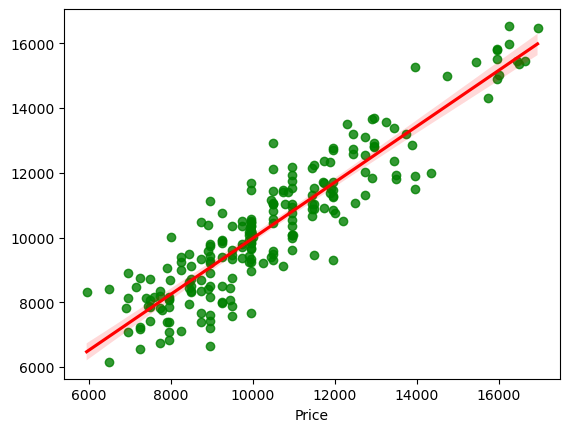

In [136]:
sns.regplot(data=df1,x=y_test,y=y_pred1,scatter_kws={'color':'green'},line_kws={'color':'red'})
## here the dots are data points of x and y
## line is a slopess
## shadded region indicates confidence interval.

In [148]:
## one coefficient value for each feature in mlr.
mlr.coef_

array([-1.77358102e+03, -4.03356813e+02, -2.15822830e+03, -6.48014975e-12,
        2.07900437e+03, -8.91800823e+01,  9.09494702e-13,  0.00000000e+00,
        6.33294767e+02, -1.42097790e+04,  5.69064882e+02])

In [150]:
## intercept value of mlr
mlr.intercept_

9819.176516345236

In [154]:
## coefficent value (beta1,beta2,...) in ridge
ridge.coef_

array([-1687.3288826 ,  -396.60706137,  -109.30261636,     0.        ,
         110.16278133,   -66.78723085,     0.        ,     0.        ,
         585.54253446, -2067.36503243,   599.70381128])

In [156]:
ridge.intercept_

9502.106427493964

In [158]:
## coefficient and intercept value for lasso

In [164]:
lasso.coef_

array([-1726.08359843,  -399.68690585, -1000.29707268,     0.        ,
         967.30888521,   -73.76027028,     0.        ,     0.        ,
         601.99688546, -7436.77774379,   505.04485181])

In [166]:
lasso.intercept_

9720.532720122912